In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset

In [77]:
data = pd.read_csv(r"C:\Users\shris\Documents\orissa_cyclone_dataset_with_direction.csv")

# Data Preprocessing

In [78]:
data.head()

,date,latitude,longitude,month,wind_speed_kmph,pressure_hpa,sea_surface_temp_C,humidity_pct,rainfall_mm,storm_surge_m,movement_dir_deg,movement_speed_kmph,cyclone_category,cyclone_next_24h,next24h_movement_dir_deg
0,2021-05-20,21.6906,84.6147,5,32.1,994.5,30.80,79.2,4.1,0.41,4,18.1,No Cyclone,0,343.1
1,2011-08-03,20.4647,83.2043,8,23.6,1001.9,28.66,75.6,0.9,0.77,310,9.3,No Cyclone,0,299.3
2,2010-12-18,19.6068,83.7506,12,56.6,1009.2,27.52,76.8,2.5,0.47,334,17.8,No Cyclone,0,315.8
3,2018-01-01,19.1567,86.4318,1,11.6,1003.2,28.21,90.4,3.5,0.37,214,19.5,No Cyclone,0,200.5
4,2016-07-12,20.9056,85.7629,7,30.0,1004.1,27.83,82.5,6.9,0.38,204,13.2,No Cyclone,0,197.2


In [79]:
data.shape

(2500, 15)

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      2500 non-null   object 
 1   latitude                  2500 non-null   float64
 2   longitude                 2500 non-null   float64
 3   month                     2500 non-null   int64  
 4   wind_speed_kmph           2500 non-null   float64
 5   pressure_hpa              2500 non-null   float64
 6   sea_surface_temp_C        2500 non-null   float64
 7   humidity_pct              2500 non-null   float64
 8   rainfall_mm               2500 non-null   float64
 9   storm_surge_m             2500 non-null   float64
 10  movement_dir_deg          2500 non-null   int64  
 11  movement_speed_kmph       2500 non-null   float64
 12  cyclone_category          2500 non-null   object 
 13  cyclone_next_24h          2500 non-null   int64  
 14  next24h_

In [81]:
data.describe()

,latitude,longitude,month,wind_speed_kmph,pressure_hpa,sea_surface_temp_C,humidity_pct,rainfall_mm,storm_surge_m,movement_dir_deg,movement_speed_kmph,cyclone_next_24h,next24h_movement_dir_deg
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000
mean,19.994392,83.968715,6.426800,29.586800,1004.460040,28.645668,79.608000,7.247920,0.37090,181.107200,25.048760,0.071600,179.952600
std,1.454428,1.730520,3.431348,15.656384,7.300654,0.825354,8.101147,15.889136,0.27979,104.079054,10.214552,0.257876,103.996909
min,17.507800,81.000100,1.000000,0.000000,977.400000,25.360000,52.300000,0.000000,0.00000,0.000000,-8.200000,0.000000,0.200000
25%,18.712300,82.479900,3.000000,18.600000,999.475000,28.080000,74.300000,1.700000,0.13000,91.000000,18.000000,0.000000,86.975000
50%,20.029350,83.955300,6.000000,29.400000,1004.400000,28.640000,79.800000,3.850000,0.35000,184.000000,25.000000,0.000000,182.350000
75%,21.248675,85.465375,9.000000,40.300000,1009.600000,29.200000,84.725000,7.800000,0.57000,271.000000,32.000000,0.000000,271.425000
max,22.498600,86.997300,12.000000,83.200000,1028.800000,31.610000,100.000000,213.900000,1.42000,359.000000,60.600000,1.000000,359.800000


# EDA Analysis

In [82]:
data.isnull().sum()

date                        0
latitude                    0
longitude                   0
month                       0
wind_speed_kmph             0
pressure_hpa                0
sea_surface_temp_C          0
humidity_pct                0
rainfall_mm                 0
storm_surge_m               0
movement_dir_deg            0
movement_speed_kmph         0
cyclone_category            0
cyclone_next_24h            0
next24h_movement_dir_deg    0
dtype: int64

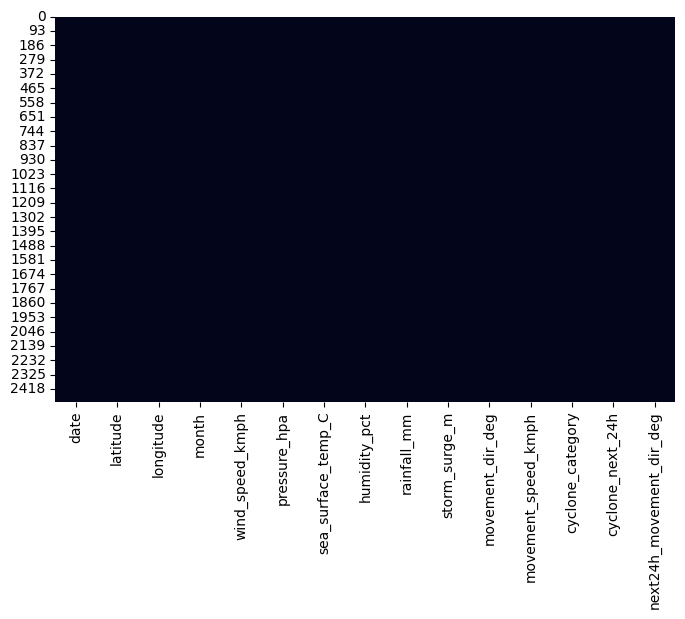

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
figure=plt.figure(figsize=(8,5))
sns.heatmap(data.isnull(), cbar=False)
plt.show()


In [84]:
data.duplicated().sum()

0

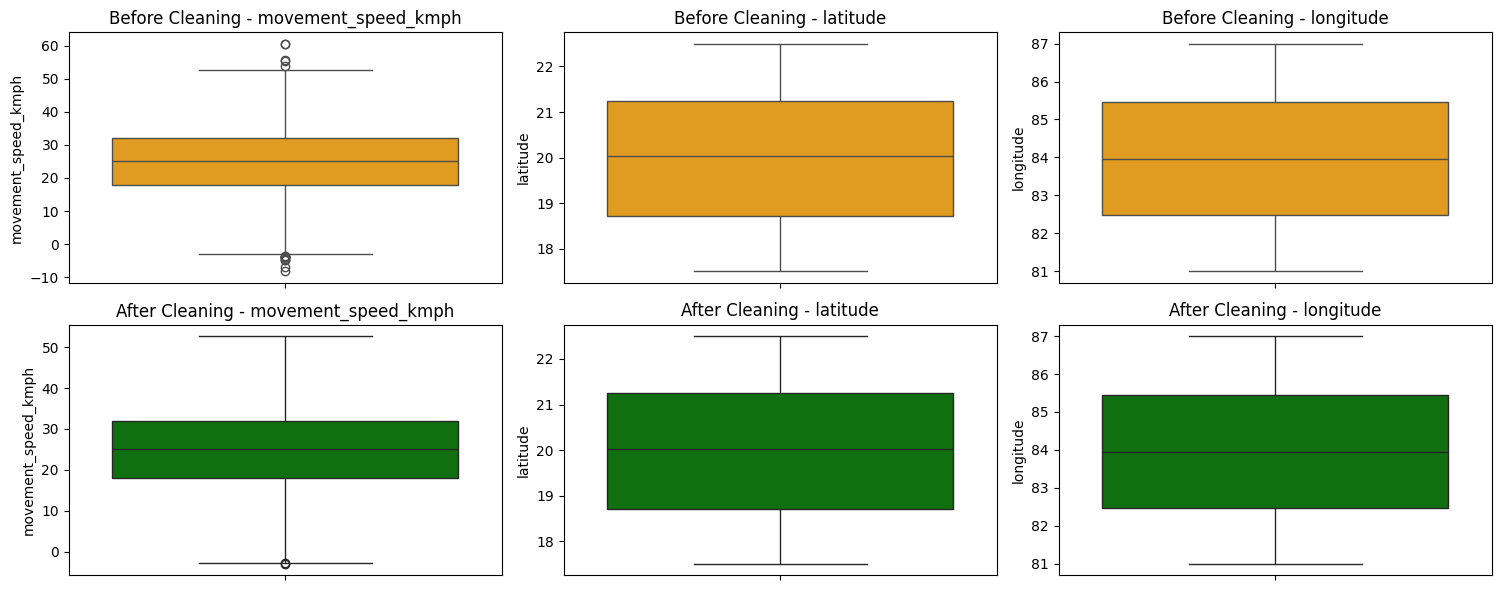

In [85]:
data.columns = data.columns.str.strip()
cols = ["movement_speed_kmph", "latitude", "longitude"]
df = data[(data["movement_speed_kmph"] <= 70) &
        (data["latitude"].between(17.5, 22.5)) &
        (data["longitude"].between(81, 87))]

def iqr_filter(data, column, k=1.5):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - k * iqr
    upper = q3 + k * iqr
    return data[(data[column] >= lower) & (data[column] <= upper)]

clean_df = df.copy()
for c in cols:
    clean_df = iqr_filter(clean_df, c)

plt.figure(figsize=(15, 6))

for i, col in enumerate(cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col], color="orange")
    plt.title(f"Before Cleaning - {col}")

    plt.subplot(2, 3, i+3)
    sns.boxplot(y=clean_df[col], color="green")
    plt.title(f"After Cleaning - {col}")

plt.tight_layout()
plt.show()
clean_df.to_csv("orissa_cyclone_dataset_cleaned.csv", index=False)



# Model Training

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, r2_score



In [110]:
X = df.drop(columns=["cyclone_next_24h", "next24h_movement_dir_deg"])
X = X.select_dtypes(include=["int64", "float64"])  


In [111]:
y_class = df["cyclone_next_24h"]
y_reg = df["next24h_movement_dir_deg"]



In [112]:
# ==== Train-Test Split ====
X_train, X_test, y_class_train, y_class_test = train_test_split(
    X, y_class, test_size=0.2, random_state=42
)
_, _, y_reg_train, y_reg_test = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)



In [113]:
# ==== Random Forest Classifier ====
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_class_train)
y_class_pred = clf.predict(X_test)



In [114]:
print("Cyclone Occurrence Prediction")
print("Accuracy:", accuracy_score(y_class_test, y_class_pred))
print("\nClassification Report:\n", classification_report(y_class_test, y_class_pred))



Cyclone Occurrence Prediction
Accuracy: 0.937625754527163

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       467
           1       0.33      0.03      0.06        30

    accuracy                           0.94       497
   macro avg       0.64      0.51      0.51       497
weighted avg       0.90      0.94      0.91       497



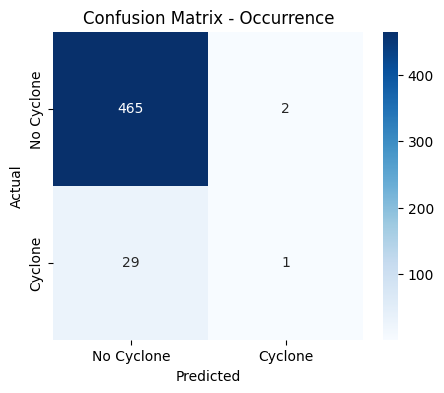

In [115]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_class_test, y_class_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Cyclone", "Cyclone"], yticklabels=["No Cyclone", "Cyclone"])
plt.title("Confusion Matrix - Occurrence")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()





In [116]:
# ==== Random Forest Regressor ====
reg = RandomForestRegressor(n_estimators=200, random_state=42)
reg.fit(X_train, y_reg_train)
y_reg_pred = reg.predict(X_test)



In [119]:
print("\nCyclone Direction Prediction")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_reg_test, y_reg_pred))
print("R² Score:", r2_score(y_reg_test, y_reg_pred))




Cyclone Direction Prediction
Mean Absolute Error (MAE): 28.89946981891347
R² Score: 0.7070391949773422


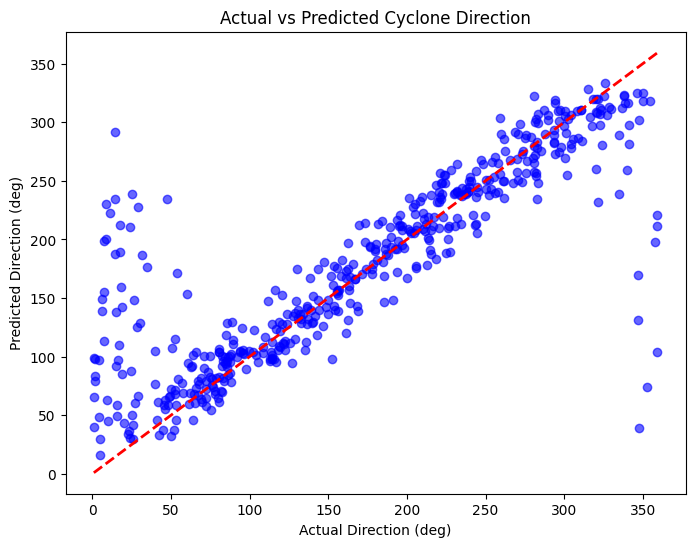

In [121]:
# ==== Actual vs Predicted (Direction) ====
plt.figure(figsize=(8,6))
plt.scatter(y_reg_test, y_reg_pred, alpha=0.6, color="blue")
plt.xlabel("Actual Direction (deg)")
plt.ylabel("Predicted Direction (deg)")
plt.title("Actual vs Predicted Cyclone Direction")
plt.plot([y_reg_test.min(), y_reg_test.max()],
         [y_reg_test.min(), y_reg_test.max()],
         'r--', lw=2)
plt.show()


# Predicted Example

In [126]:
example_data = {
    "wind_speed_kmph": [110],
    "pressure_hpa": [960],
    "sea_surface_temp_C": [29.2],
    "humidity_pct": [82],
    "rainfall_mm": [180],
    "storm_surge_m": [2.8],
    "movement_speed_kmph": [20],
    "movement_dir_deg": [75],
    "latitude": [19.5],
    "longitude": [85.1],
    "month": [9]
}

example_df = pd.DataFrame(example_data)

example_df = example_df[X_train.columns]

cyclone_occurrence = clf.predict(example_df)[0]
cyclone_direction = reg.predict(example_df)[0]

print("Prediction Results")
print("Cyclone in next 24h?:", "YES" if cyclone_occurrence == 1 else "NO")
print(f"Predicted Movement Direction: {cyclone_direction:.2f}°")


Prediction Results
Cyclone in next 24h?: YES
Predicted Movement Direction: 117.84°
